<a href="https://colab.research.google.com/github/Shubham-naik-ai/Jforce/blob/main/Jforce_assignment_2(EDA).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [70]:
# Importing usefull libraries for EDA
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

import os
from google.colab import drive
drive.mount('/content/drive')
working_dir_path = '/content/drive/MyDrive/Jforce/'

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [71]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV

from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score, roc_auc_score, confusion_matrix, roc_curve, auc

from sklearn.svm import SVC

In [72]:
#Loading the Dataset
df = pd.read_csv(working_dir_path + 'lending_club_loans - lending_club_loans.csv',skiprows=1)

/usr/local/lib/python3.9/dist-packages/IPython/core/interactiveshell.py:3326: DtypeWarning: Columns (0,49) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


In [73]:
df.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit
0,1077501,1296599.0,5000.0,5000.0,4975.0,36 months,10.65%,162.87,B,B2,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
1,1077430,1314167.0,2500.0,2500.0,2500.0,60 months,15.27%,59.83,C,C4,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
2,1077175,1313524.0,2400.0,2400.0,2400.0,36 months,15.96%,84.33,C,C5,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
3,1076863,1277178.0,10000.0,10000.0,10000.0,36 months,13.49%,339.31,C,C1,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
4,1075358,1311748.0,3000.0,3000.0,3000.0,60 months,12.69%,67.79,B,B5,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN


In [74]:
# Checking the dimensions
df.shape

(42542, 115)

In [75]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42542 entries, 0 to 42541
Columns: 115 entries, id to total_il_high_credit_limit
dtypes: float64(90), object(25)
memory usage: 37.3+ MB


In [76]:
df.describe()

,member_id,loan_amnt,funded_amnt,funded_amnt_inv,installment,annual_inc,dti,delinq_2yrs,fico_range_low,fico_range_high,...,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit
count,4.253500e+04,42535.000000,42535.000000,42535.000000,42535.000000,4.253100e+04,42535.000000,42506.000000,42535.000000,42535.000000,...,0.0,0.0,0.0,0.0,41170.000000,42430.000000,0.0,0.0,0.0,0.0
mean,8.257026e+05,11089.722581,10821.585753,10139.830603,322.623063,6.913656e+04,13.373043,0.152449,713.052545,717.052545,...,NaN,NaN,NaN,NaN,0.045227,0.000024,NaN,NaN,NaN,NaN
std,2.795409e+05,7410.938391,7146.914675,7131.686447,208.927216,6.409635e+04,6.726315,0.512406,36.188439,36.188439,...,NaN,NaN,NaN,NaN,0.208737,0.004855,NaN,NaN,NaN,NaN
min,7.047300e+04,500.000000,500.000000,0.000000,15.670000,1.896000e+03,0.000000,0.000000,610.000000,614.000000,...,NaN,NaN,NaN,NaN,0.000000,0.000000,NaN,NaN,NaN,NaN
25%,6.384795e+05,5200.000000,5000.000000,4950.000000,165.520000,4.000000e+04,8.200000,0.000000,685.000000,689.000000,...,NaN,NaN,NaN,NaN,0.000000,0.000000,NaN,NaN,NaN,NaN
50%,8.241780e+05,9700.000000,9600.000000,8500.000000,277.690000,5.900000e+04,13.470000,0.000000,710.000000,714.000000,...,NaN,NaN,NaN,NaN,0.000000,0.000000,NaN,NaN,NaN,NaN
75%,1.033946e+06,15000.000000,15000.000000,14000.000000,428.180000,8.250000e+04,18.680000,0.000000,740.000000,744.000000,...,NaN,NaN,NaN,NaN,0.000000,0.000000,NaN,NaN,NaN,NaN
max,1.314167e+06,35000.000000,35000.000000,35000.000000,1305.190000,6.000000e+06,29.990000,13.000000,825.000000,829.000000,...,NaN,NaN,NaN,NaN,2.000000,1.000000,NaN,NaN,NaN,NaN


## **Treating Null Values**

In [77]:
df.isnull().sum()

id                                4
member_id                         7
loan_amnt                         7
funded_amnt                       7
funded_amnt_inv                   7
                              ...  
tax_liens                       112
tot_hi_cred_lim               42542
total_bal_ex_mort             42542
total_bc_limit                42542
total_il_high_credit_limit    42542
Length: 115, dtype: int64

In [78]:
# Set the threshold for the percentage of null values
threshold = 0.7

# Calculate the percentage of null values in each column
null_percentage = df.isnull().sum() / len(df)

# Create a list of columns to drop
cols_to_drop = null_percentage[null_percentage > threshold].index.tolist()

# Drop the columns from the DataFrame
df = df.drop(cols_to_drop, axis=1)

# Print the updated DataFrame
df.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,last_fico_range_high,last_fico_range_low,collections_12_mths_ex_med,policy_code,application_type,acc_now_delinq,chargeoff_within_12_mths,delinq_amnt,pub_rec_bankruptcies,tax_liens
0,1077501,1296599.0,5000.0,5000.0,4975.0,36 months,10.65%,162.87,B,B2,...,744.0,740.0,0.0,1.0,INDIVIDUAL,0.0,0.0,0.0,0.0,0.0
1,1077430,1314167.0,2500.0,2500.0,2500.0,60 months,15.27%,59.83,C,C4,...,499.0,0.0,0.0,1.0,INDIVIDUAL,0.0,0.0,0.0,0.0,0.0
2,1077175,1313524.0,2400.0,2400.0,2400.0,36 months,15.96%,84.33,C,C5,...,719.0,715.0,0.0,1.0,INDIVIDUAL,0.0,0.0,0.0,0.0,0.0
3,1076863,1277178.0,10000.0,10000.0,10000.0,36 months,13.49%,339.31,C,C1,...,604.0,600.0,0.0,1.0,INDIVIDUAL,0.0,0.0,0.0,0.0,0.0
4,1075358,1311748.0,3000.0,3000.0,3000.0,60 months,12.69%,67.79,B,B5,...,694.0,690.0,0.0,1.0,INDIVIDUAL,0.0,0.0,0.0,0.0,0.0


In [79]:
df.columns

Index(['id', 'member_id', 'loan_amnt', 'funded_amnt', 'funded_amnt_inv',
       'term', 'int_rate', 'installment', 'grade', 'sub_grade', 'emp_title',
       'emp_length', 'home_ownership', 'annual_inc', 'verification_status',
       'issue_d', 'loan_status', 'pymnt_plan', 'url', 'desc', 'purpose',
       'title', 'zip_code', 'addr_state', 'dti', 'delinq_2yrs',
       'earliest_cr_line', 'fico_range_low', 'fico_range_high',
       'inq_last_6mths', 'mths_since_last_delinq', 'open_acc', 'pub_rec',
       'revol_bal', 'revol_util', 'total_acc', 'initial_list_status',
       'out_prncp', 'out_prncp_inv', 'total_pymnt', 'total_pymnt_inv',
       'total_rec_prncp', 'total_rec_int', 'total_rec_late_fee', 'recoveries',
       'collection_recovery_fee', 'last_pymnt_d', 'last_pymnt_amnt',
       'last_credit_pull_d', 'last_fico_range_high', 'last_fico_range_low',
       'collections_12_mths_ex_med', 'policy_code', 'application_type',
       'acc_now_delinq', 'chargeoff_within_12_mths', 'delinq_a

In [80]:
df.isnull().sum()

id                                4
member_id                         7
loan_amnt                         7
funded_amnt                       7
funded_amnt_inv                   7
term                              7
int_rate                          7
installment                       7
grade                             7
sub_grade                         7
emp_title                      2633
emp_length                     1119
home_ownership                    7
annual_inc                       11
verification_status               7
issue_d                           7
loan_status                       7
pymnt_plan                        7
url                               7
desc                          13300
purpose                           7
title                            20
zip_code                          7
addr_state                        7
dti                               7
delinq_2yrs                      36
earliest_cr_line                 36
fico_range_low              

In [81]:
df.shape

(42542, 59)

In [82]:
df.drop(['desc'],axis = 1 ,inplace = True)

In [83]:
df.drop(['mths_since_last_delinq'],axis = 1, inplace = True)

In [84]:
#df.drop(['emp_title'],axis = 1, inplace = True)

In [85]:
df.dropna(inplace=True)

In [86]:
df.isnull().sum()

id                            0
member_id                     0
loan_amnt                     0
funded_amnt                   0
funded_amnt_inv               0
term                          0
int_rate                      0
installment                   0
grade                         0
sub_grade                     0
emp_title                     0
emp_length                    0
home_ownership                0
annual_inc                    0
verification_status           0
issue_d                       0
loan_status                   0
pymnt_plan                    0
url                           0
purpose                       0
title                         0
zip_code                      0
addr_state                    0
dti                           0
delinq_2yrs                   0
earliest_cr_line              0
fico_range_low                0
fico_range_high               0
inq_last_6mths                0
open_acc                      0
pub_rec                       0
revol_ba

In [87]:
df.shape

(38433, 57)

## **Looking for and handling Outliers**

<AxesSubplot:title={'center':'Outliers visualization'}>

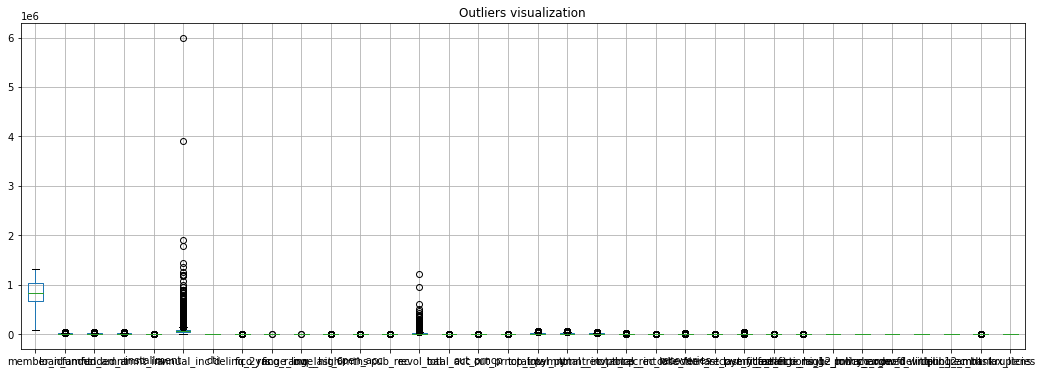

In [88]:
plt.subplots(figsize=(18,6))
plt.title("Outliers visualization")
df.boxplot()

In [89]:
num_var = df.select_dtypes(exclude='object')
for i in num_var:
    
    q1 = df[i].quantile(0.25)
    q3 = df[i].quantile(0.75)

    IQR = q3 - q1
    UL = q3 + 1.5*IQR
    LL = q1 - 1.5*IQR

    print('IQR of',i,'= ',IQR)
    print('UL of',i,'= ',UL)
    print('LL of',i,'= ',LL)
    print('Number of Outliers in',i,' = ',(df.shape[0] - df[(df[i]<UL) & (df[i]>LL)].shape[0]))
    print(' ')

IQR of member_id =  380912.0
UL of member_id =  1611869.0
LL of member_id =  88221.0
Number of Outliers in member_id  =  0
 
IQR of loan_amnt =  9500.0
UL of loan_amnt =  29250.0
LL of loan_amnt =  -8750.0
Number of Outliers in loan_amnt  =  1138
 
IQR of funded_amnt =  9550.0
UL of funded_amnt =  29325.0
LL of funded_amnt =  -8875.0
Number of Outliers in funded_amnt  =  963
 
IQR of funded_amnt_inv =  9400.0
UL of funded_amnt_inv =  28500.0
LL of funded_amnt_inv =  -9100.0
Number of Outliers in funded_amnt_inv  =  925
 
IQR of installment =  262.53
UL of installment =  824.415
LL of installment =  -225.70499999999996
Number of Outliers in installment  =  1215
 
IQR of annual_inc =  41000.0
UL of annual_inc =  144500.0
LL of annual_inc =  -19500.0
Number of Outliers in annual_inc  =  1842
 
IQR of dti =  10.37
UL of dti =  34.325
LL of dti =  -7.154999999999999
Number of Outliers in dti  =  0
 
IQR of delinq_2yrs =  0.0
UL of delinq_2yrs =  0.0
LL of delinq_2yrs =  0.0
Number of Outlie

In [90]:
df.shape

(38433, 57)

In [91]:
# IQR
Q1 = np.percentile(df['installment'], 25,
                   interpolation = 'midpoint')
 
Q3 = np.percentile(df['installment'], 75,
                   interpolation = 'midpoint')
IQR = Q3 - Q1
 
print("Old Shape: ", df.shape)
 
# Upper bound
upper=Q3+1.5*IQR
upper_array=np.array(df['installment']>=upper)

# Lower bound
lower=Q1-1.5*IQR
lower_array=np.array(df['installment']<=lower)

# Removing the outliers
df = df[(df['installment'] >= lower) & (df['installment'] <= upper)]

df.shape

Old Shape:  (38433, 57)


<ipython-input-91-a43922d316e3>:2: DeprecationWarning: the `interpolation=` argument to percentile was renamed to `method=`, which has additional options.
Users of the modes 'nearest', 'lower', 'higher', or 'midpoint' are encouraged to review the method they. (Deprecated NumPy 1.22)
  Q1 = np.percentile(df['installment'], 25,
<ipython-input-91-a43922d316e3>:5: DeprecationWarning: the `interpolation=` argument to percentile was renamed to `method=`, which has additional options.
Users of the modes 'nearest', 'lower', 'higher', or 'midpoint' are encouraged to review the method they. (Deprecated NumPy 1.22)
  Q3 = np.percentile(df['installment'], 75,


(37218, 57)

In [92]:
# IQR
Q1 = np.percentile(df['funded_amnt'], 25,
                   interpolation = 'midpoint')
 
Q3 = np.percentile(df['funded_amnt'], 75,
                   interpolation = 'midpoint')
IQR = Q3 - Q1
 
print("Old Shape: ", df.shape)
 
# Upper bound
upper=Q3+1.5*IQR
upper_array=np.array(df['funded_amnt']>=upper)

# Lower bound
lower=Q1-1.5*IQR
lower_array=np.array(df['funded_amnt']<=lower)

# Removing the outliers
df = df[(df['funded_amnt'] >= lower) & (df['funded_amnt'] <= upper)]

df.shape

Old Shape:  (37218, 57)


<ipython-input-92-76650ab6bd6a>:2: DeprecationWarning: the `interpolation=` argument to percentile was renamed to `method=`, which has additional options.
Users of the modes 'nearest', 'lower', 'higher', or 'midpoint' are encouraged to review the method they. (Deprecated NumPy 1.22)
  Q1 = np.percentile(df['funded_amnt'], 25,
<ipython-input-92-76650ab6bd6a>:5: DeprecationWarning: the `interpolation=` argument to percentile was renamed to `method=`, which has additional options.
Users of the modes 'nearest', 'lower', 'higher', or 'midpoint' are encouraged to review the method they. (Deprecated NumPy 1.22)
  Q3 = np.percentile(df['funded_amnt'], 75,


(36783, 57)

In [93]:
# IQR
Q1 = np.percentile(df['revol_bal'], 25,
                   interpolation = 'midpoint')
 
Q3 = np.percentile(df['revol_bal'], 75,
                   interpolation = 'midpoint')
IQR = Q3 - Q1
 
print("Old Shape: ", df.shape)
 
# Upper bound
upper=Q3+1.5*IQR
upper_array=np.array(df['revol_bal']>=upper)

# Lower bound
lower=Q1-1.5*IQR
lower_array=np.array(df['revol_bal']<=lower)

# Removing the outliers
df = df[(df['revol_bal'] >= lower) & (df['revol_bal'] <= upper)]

df.shape

Old Shape:  (36783, 57)


<ipython-input-93-c9dfeaaa9d20>:2: DeprecationWarning: the `interpolation=` argument to percentile was renamed to `method=`, which has additional options.
Users of the modes 'nearest', 'lower', 'higher', or 'midpoint' are encouraged to review the method they. (Deprecated NumPy 1.22)
  Q1 = np.percentile(df['revol_bal'], 25,
<ipython-input-93-c9dfeaaa9d20>:5: DeprecationWarning: the `interpolation=` argument to percentile was renamed to `method=`, which has additional options.
Users of the modes 'nearest', 'lower', 'higher', or 'midpoint' are encouraged to review the method they. (Deprecated NumPy 1.22)
  Q3 = np.percentile(df['revol_bal'], 75,


(34425, 57)

In [94]:
# IQR
Q1 = np.percentile(df['total_pymnt_inv'], 25,
                   interpolation = 'midpoint')
 
Q3 = np.percentile(df['total_pymnt_inv'], 75,
                   interpolation = 'midpoint')
IQR = Q3 - Q1
 
print("Old Shape: ", df.shape)
 
# Upper bound
upper=Q3+1.5*IQR
upper_array=np.array(df['total_pymnt_inv']>=upper)

# Lower bound
lower=Q1-1.5*IQR
lower_array=np.array(df['total_pymnt_inv']<=lower)

# Removing the outliers
df = df[(df['total_pymnt_inv'] >= lower) & (df['total_pymnt_inv'] <= upper)]

df.shape

Old Shape:  (34425, 57)


<ipython-input-94-ba0956b786d5>:2: DeprecationWarning: the `interpolation=` argument to percentile was renamed to `method=`, which has additional options.
Users of the modes 'nearest', 'lower', 'higher', or 'midpoint' are encouraged to review the method they. (Deprecated NumPy 1.22)
  Q1 = np.percentile(df['total_pymnt_inv'], 25,
<ipython-input-94-ba0956b786d5>:5: DeprecationWarning: the `interpolation=` argument to percentile was renamed to `method=`, which has additional options.
Users of the modes 'nearest', 'lower', 'higher', or 'midpoint' are encouraged to review the method they. (Deprecated NumPy 1.22)
  Q3 = np.percentile(df['total_pymnt_inv'], 75,


(33628, 57)

In [95]:
# IQR
Q1 = np.percentile(df['total_rec_int'], 25,
                   interpolation = 'midpoint')
 
Q3 = np.percentile(df['total_rec_int'], 75,
                   interpolation = 'midpoint')
IQR = Q3 - Q1
 
print("Old Shape: ", df.shape)
 
# Upper bound
upper=Q3+1.5*IQR
upper_array=np.array(df['total_rec_int']>=upper)

# Lower bound
lower=Q1-1.5*IQR
lower_array=np.array(df['total_rec_int']<=lower)

# Removing the outliers
df = df[(df['total_rec_int'] >= lower) & (df['total_rec_int'] <= upper)]

df.shape

Old Shape:  (33628, 57)


<ipython-input-95-3c268388a6c5>:2: DeprecationWarning: the `interpolation=` argument to percentile was renamed to `method=`, which has additional options.
Users of the modes 'nearest', 'lower', 'higher', or 'midpoint' are encouraged to review the method they. (Deprecated NumPy 1.22)
  Q1 = np.percentile(df['total_rec_int'], 25,
<ipython-input-95-3c268388a6c5>:5: DeprecationWarning: the `interpolation=` argument to percentile was renamed to `method=`, which has additional options.
Users of the modes 'nearest', 'lower', 'higher', or 'midpoint' are encouraged to review the method they. (Deprecated NumPy 1.22)
  Q3 = np.percentile(df['total_rec_int'], 75,


(31562, 57)

In [96]:
# IQR
Q1 = np.percentile(df['last_pymnt_amnt'], 25,
                   interpolation = 'midpoint')
 
Q3 = np.percentile(df['last_pymnt_amnt'], 75,
                   interpolation = 'midpoint')
IQR = Q3 - Q1
 
print("Old Shape: ", df.shape)
 
# Upper bound
upper=Q3+1.5*IQR
upper_array=np.array(df['last_pymnt_amnt']>=upper)

# Lower bound
lower=Q1-1.5*IQR
lower_array=np.array(df['last_pymnt_amnt']<=lower)

# Removing the outliers
df = df[(df['last_pymnt_amnt'] >= lower) & (df['last_pymnt_amnt'] <= upper)]

df.shape

<ipython-input-96-0508596d5762>:2: DeprecationWarning: the `interpolation=` argument to percentile was renamed to `method=`, which has additional options.
Users of the modes 'nearest', 'lower', 'higher', or 'midpoint' are encouraged to review the method they. (Deprecated NumPy 1.22)
  Q1 = np.percentile(df['last_pymnt_amnt'], 25,
<ipython-input-96-0508596d5762>:5: DeprecationWarning: the `interpolation=` argument to percentile was renamed to `method=`, which has additional options.
Users of the modes 'nearest', 'lower', 'higher', or 'midpoint' are encouraged to review the method they. (Deprecated NumPy 1.22)
  Q3 = np.percentile(df['last_pymnt_amnt'], 75,


Old Shape:  (31562, 57)


(28371, 57)

-----------------------------------------------------------------------------

In [97]:
# IQR
Q1 = np.percentile(df['total_acc'], 25,
                   interpolation = 'midpoint')
 
Q3 = np.percentile(df['total_acc'], 75,
                   interpolation = 'midpoint')
IQR = Q3 - Q1
 
print("Old Shape: ", df.shape)
 
# Upper bound
upper=Q3+1.5*IQR
upper_array=np.array(df['total_acc']>=upper)

# Lower bound
lower=Q1-1.5*IQR
lower_array=np.array(df['total_acc']<=lower)

# Removing the outliers
df = df[(df['total_acc'] >= lower) & (df['total_acc'] <= upper)]

df.shape

Old Shape:  (28371, 57)


<ipython-input-97-78f67ea42faf>:2: DeprecationWarning: the `interpolation=` argument to percentile was renamed to `method=`, which has additional options.
Users of the modes 'nearest', 'lower', 'higher', or 'midpoint' are encouraged to review the method they. (Deprecated NumPy 1.22)
  Q1 = np.percentile(df['total_acc'], 25,
<ipython-input-97-78f67ea42faf>:5: DeprecationWarning: the `interpolation=` argument to percentile was renamed to `method=`, which has additional options.
Users of the modes 'nearest', 'lower', 'higher', or 'midpoint' are encouraged to review the method they. (Deprecated NumPy 1.22)
  Q3 = np.percentile(df['total_acc'], 75,


(27868, 57)

In [98]:
# IQR
Q1 = np.percentile(df['annual_inc'], 25,
                   interpolation = 'midpoint')
 
Q3 = np.percentile(df['annual_inc'], 75,
                   interpolation = 'midpoint')
IQR = Q3 - Q1
 
print("Old Shape: ", df.shape)
 
# Upper bound
upper=Q3+1.5*IQR
upper_array=np.array(df['annual_inc']>=upper)

# Lower bound
lower=Q1-1.5*IQR
lower_array=np.array(df['annual_inc']<=lower)

# Removing the outliers
df = df[(df['annual_inc'] >= lower) & (df['annual_inc'] <= upper)]

df.shape

<ipython-input-98-1accd9449fcf>:2: DeprecationWarning: the `interpolation=` argument to percentile was renamed to `method=`, which has additional options.
Users of the modes 'nearest', 'lower', 'higher', or 'midpoint' are encouraged to review the method they. (Deprecated NumPy 1.22)
  Q1 = np.percentile(df['annual_inc'], 25,
<ipython-input-98-1accd9449fcf>:5: DeprecationWarning: the `interpolation=` argument to percentile was renamed to `method=`, which has additional options.
Users of the modes 'nearest', 'lower', 'higher', or 'midpoint' are encouraged to review the method they. (Deprecated NumPy 1.22)
  Q3 = np.percentile(df['annual_inc'], 75,


Old Shape:  (27868, 57)


(26736, 57)

In [99]:
# IQR
Q1 = np.percentile(df['loan_amnt'], 25,
                   interpolation = 'midpoint')
 
Q3 = np.percentile(df['loan_amnt'], 75,
                   interpolation = 'midpoint')
IQR = Q3 - Q1
 
print("Old Shape: ", df.shape)
 
# Upper bound
upper=Q3+1.5*IQR
upper_array=np.array(df['loan_amnt']>=upper)

# Lower bound
lower=Q1-1.5*IQR
lower_array=np.array(df['loan_amnt']<=lower)

# Removing the outliers
df = df[(df['loan_amnt'] >= lower) & (df['loan_amnt'] <= upper)]

df.shape

<ipython-input-99-c344b834e6fc>:2: DeprecationWarning: the `interpolation=` argument to percentile was renamed to `method=`, which has additional options.
Users of the modes 'nearest', 'lower', 'higher', or 'midpoint' are encouraged to review the method they. (Deprecated NumPy 1.22)
  Q1 = np.percentile(df['loan_amnt'], 25,
<ipython-input-99-c344b834e6fc>:5: DeprecationWarning: the `interpolation=` argument to percentile was renamed to `method=`, which has additional options.
Users of the modes 'nearest', 'lower', 'higher', or 'midpoint' are encouraged to review the method they. (Deprecated NumPy 1.22)
  Q3 = np.percentile(df['loan_amnt'], 75,


Old Shape:  (26736, 57)


(26171, 57)

## **EDA**

<AxesSubplot:>

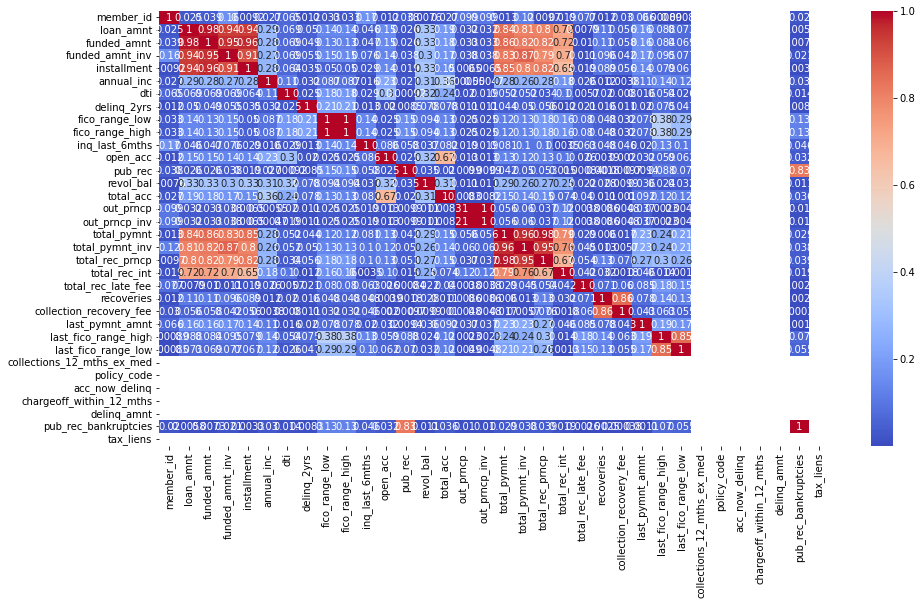

In [100]:
 ## Correlation
plt.figure(figsize=(15,8))
correlation = df.corr()
sns.heatmap(abs(correlation), annot=True, cmap='coolwarm')

In [101]:
# Counting observations from 'term'
df["term"].value_counts()

 36 months    21678
 60 months     4493
Name: term, dtype: int64

/usr/local/lib/python3.9/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


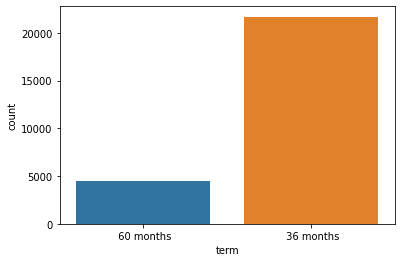

In [102]:
# Ploting observations from 'term'

sns.countplot(df['term'])
plt.show()

From above graph we can see that most of the users choose 36 months tenure.

In [103]:
# Counting observations from 'high_risk_applicants'
df["loan_status"].value_counts()

Fully Paid                                             21128
Charged Off                                             3618
Does not meet the credit policy. Status:Fully Paid       926
Does not meet the credit policy. Status:Charged Off      361
Current                                                  133
Late (16-30 days)                                          2
Late (31-120 days)                                         2
In Grace Period                                            1
Name: loan_status, dtype: int64

In [104]:
df['loan_status'] = df['loan_status'].replace({'Does not meet the credit policy. Status:Charged Off':'Charged Off',
                                               'Default':'Charged Off','Does not meet the credit policy. Status:Fully Paid':'Fully Paid',
                                               'Current':'Fully Paid'})

In [105]:
df["loan_status"].value_counts()

Fully Paid            22187
Charged Off            3979
Late (16-30 days)         2
Late (31-120 days)        2
In Grace Period           1
Name: loan_status, dtype: int64

In [106]:
df = df[df.loan_status != 'In Grace Period']

In [107]:
df = df[df.loan_status != 'Late (31-120 days)']

In [108]:
df = df[df.loan_status != 'Late (16-30 days)']

In [109]:
df["loan_status"].value_counts()

Fully Paid     22187
Charged Off     3979
Name: loan_status, dtype: int64

/usr/local/lib/python3.9/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


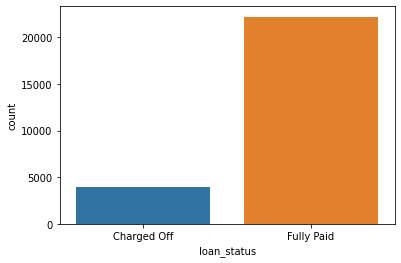

In [110]:
# Ploting observations from 'loan_status'

sns.countplot(df['loan_status'])
plt.show()

In above graph we can see that almost 23000 users had Fully paid and around 4000 are Charged Off

In [111]:
df.emp_length.unique()

array(['< 1 year', '10+ years', '1 year', '3 years', '8 years', '9 years',
       '5 years', '4 years', '2 years', '7 years', '6 years'],
      dtype=object)

In [112]:
#remove years,+,NAN   ... /d is matching decimal digit
import re

df["emp_length"]=[0 if str(x) =="< 1 year" else x if str(x) == "nan" else int(re.findall(r'\d+',str(x))[0]) for x in (df['emp_length'])]
df["emp_length"].head()

1     0
3    10
4     1
5     3
6     8
Name: emp_length, dtype: int64

In [113]:
df.emp_length.unique()

array([ 0, 10,  1,  3,  8,  9,  5,  4,  2,  7,  6])

/usr/local/lib/python3.9/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


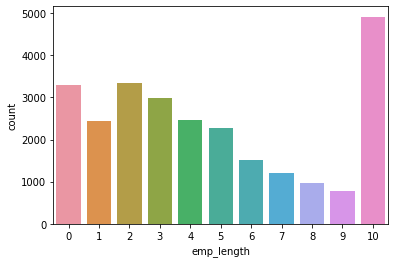

In [114]:
# Ploting observations from 'emp_length'

sns.countplot(df['emp_length'])
plt.show()

In [115]:
df["home_ownership"].value_counts()

RENT        14217
MORTGAGE     9876
OWN          1969
OTHER         104
Name: home_ownership, dtype: int64

/usr/local/lib/python3.9/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


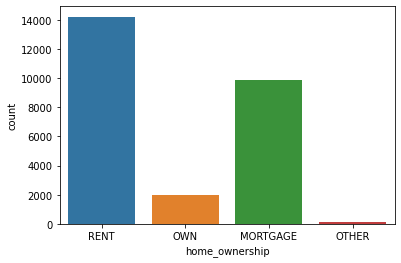

In [116]:
# Ploting observations from 'home_ownership'

sns.countplot(df['home_ownership'])
plt.show()

/usr/local/lib/python3.9/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


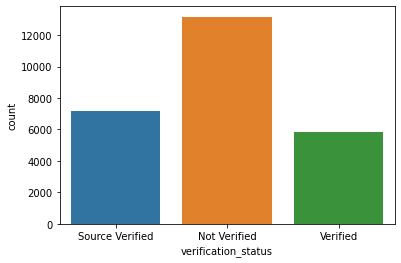

In [117]:
# Ploting observations from 'verification_status'

sns.countplot(df['verification_status'])
plt.show()

In [118]:
df["purpose"].value_counts()

debt_consolidation    11720
credit_card            3269
other                  3038
home_improvement       1780
major_purchase         1671
car                    1228
small_business          894
wedding                 708
medical                 514
moving                  468
vacation                303
educational             280
house                   233
renewable_energy         60
Name: purpose, dtype: int64

/usr/local/lib/python3.9/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


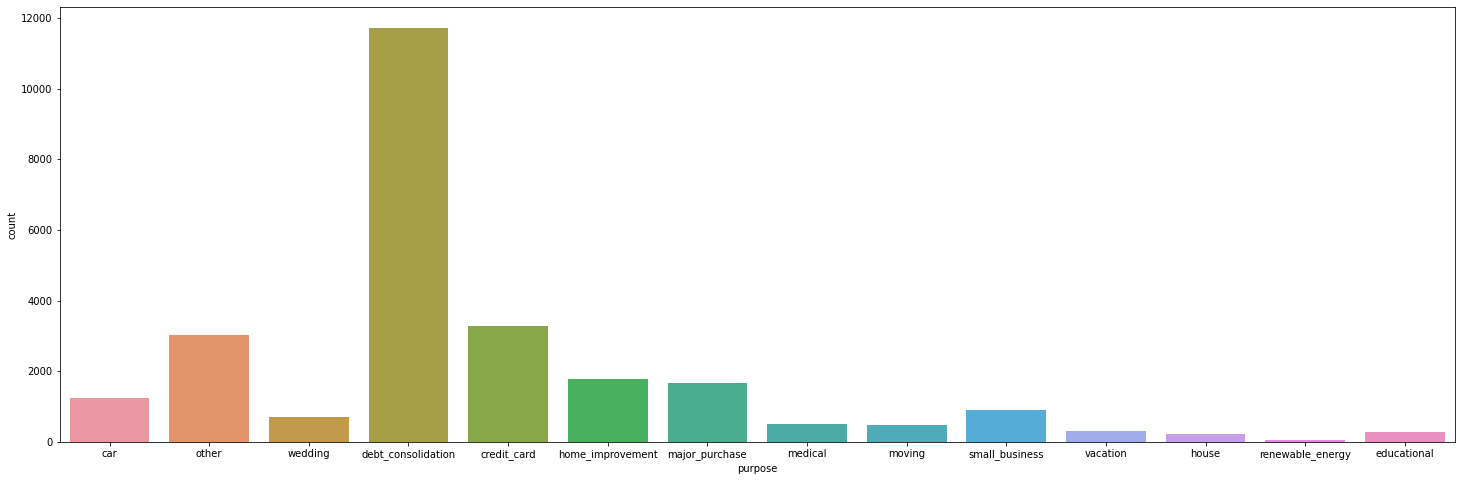

In [119]:
# Ploting observations from 'verification_status'
plt.figure(figsize = (25,8))
sns.countplot(df['purpose'])
plt.show()

<AxesSubplot:xlabel='grade'>

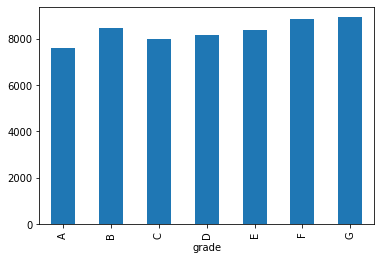

In [120]:
df.groupby('grade')['loan_amnt'].mean().round(0).plot.bar()

/usr/local/lib/python3.9/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


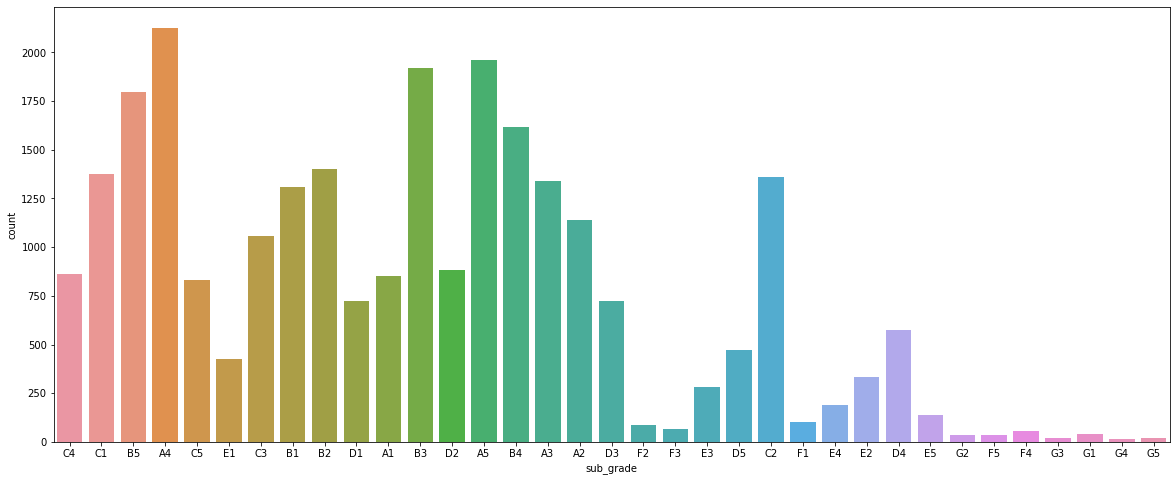

In [121]:
plt.figure(figsize = (20,8))
sns.countplot(df['sub_grade'])
plt.show()

In [122]:
df['fico_range_low'] = df['fico_range_low'].astype(int)

/usr/local/lib/python3.9/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


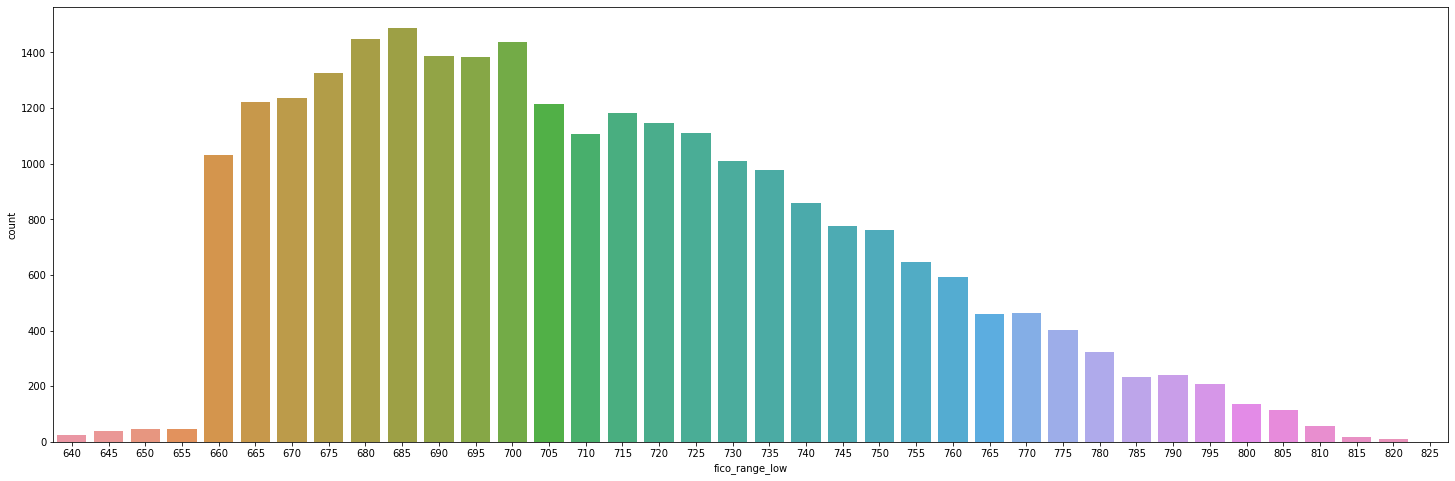

In [123]:
plt.figure(figsize = (25,8))
sns.countplot(df['fico_range_low'])
plt.show()

In [124]:
df['fico_range_high'] = df['fico_range_high'].astype(int)

/usr/local/lib/python3.9/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


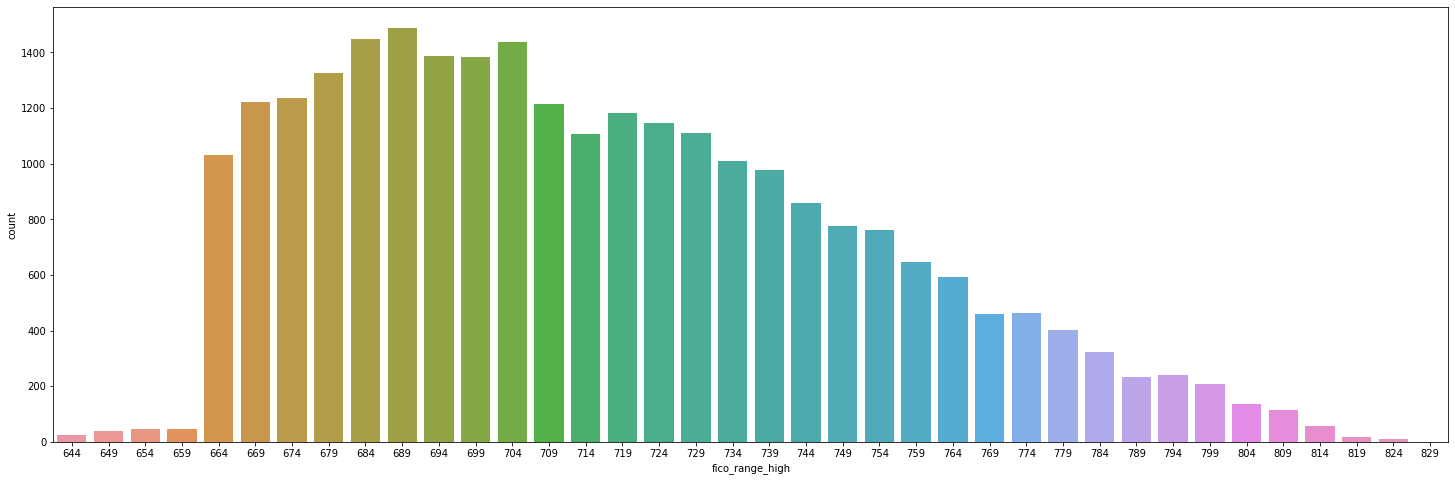

In [125]:
plt.figure(figsize = (25,8))
sns.countplot(df['fico_range_high'])
plt.show()

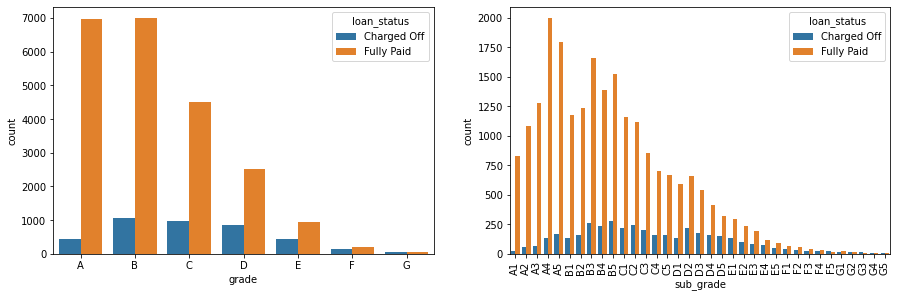

In [126]:
plt.figure(figsize=(15, 10))

plt.subplot(2, 2, 1)
grade = sorted(df.grade.unique().tolist())
sns.countplot(x='grade', data=df, hue='loan_status', order=grade)

plt.subplot(2, 2, 2)
sub_grade = sorted(df.sub_grade.unique().tolist())
g = sns.countplot(x='sub_grade', data=df, hue='loan_status', order=sub_grade)
g.set_xticklabels(g.get_xticklabels(), rotation=90);

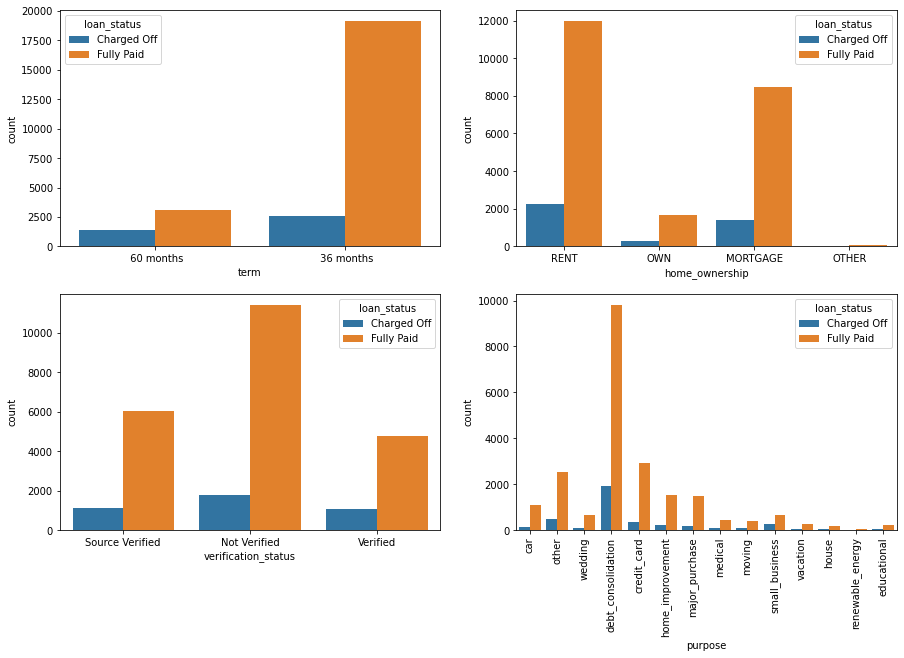

In [127]:
plt.figure(figsize=(15, 20))

plt.subplot(4, 2, 1)
sns.countplot(x='term', data=df, hue='loan_status')

plt.subplot(4, 2, 2)
sns.countplot(x='home_ownership', data=df, hue='loan_status')

plt.subplot(4, 2, 3)
sns.countplot(x='verification_status', data=df, hue='loan_status')

plt.subplot(4, 2, 4)
g = sns.countplot(x='purpose', data=df, hue='loan_status')
g.set_xticklabels(g.get_xticklabels(), rotation=90);

In [128]:
df['emp_title'].value_counts()[:20]

US Army                    79
Bank of America            73
US Air Force               41
AT&T                       38
Wells Fargo                36
Walmart                    35
UPS                        34
United States Air Force    33
Kaiser Permanente          32
IBM                        32
State of California        32
Target                     31
Verizon Wireless           30
Best Buy                   30
USAF                       29
Self Employed              29
USPS                       29
U.S. Army                  26
Walgreens                  26
Self                       25
Name: emp_title, dtype: int64

In [129]:
df['issue_d'] = pd.to_datetime(df['issue_d'])
df['earliest_cr_line'] = pd.to_datetime(df['earliest_cr_line'])

In [130]:
df['earliest_cr_line'] = df.earliest_cr_line.dt.year

In [131]:
df.earliest_cr_line.nunique()

49

In [132]:
df.earliest_cr_line.value_counts()

2000    2299
1999    2087
1998    1909
2001    1907
1997    1540
2002    1499
2003    1496
2004    1448
1996    1366
2005    1295
1995    1248
1994    1119
2006    1071
1993     812
2007     644
1992     564
1990     525
1991     508
1989     450
1988     373
1987     325
1986     283
1985     220
1984     185
1983     159
2008     134
1982     111
1980      89
1981      83
1978      73
1979      72
1977      49
1976      42
1975      28
1974      28
1973      23
1970      23
1971      18
1969      16
1972      15
1967      10
1968       6
1963       5
1966       4
1956       1
1946       1
1964       1
1954       1
1965       1
Name: earliest_cr_line, dtype: int64

In [133]:
def pub_rec(number):
    if number == 0.0:
        return 0
    else:
        return 1
    
def mort_acc(number):
    if number == 0.0:
        return 0
    elif number >= 1.0:
        return 1
    else:
        return number
    
def pub_rec_bankruptcies(number):
    if number == 0.0:
        return 0
    elif number >= 1.0:
        return 1
    else:
        return number

In [134]:
df['pub_rec'] = df.pub_rec.apply(pub_rec)
df['pub_rec_bankruptcies'] = df.pub_rec_bankruptcies.apply(pub_rec_bankruptcies)

<AxesSubplot:xlabel='pub_rec_bankruptcies', ylabel='count'>

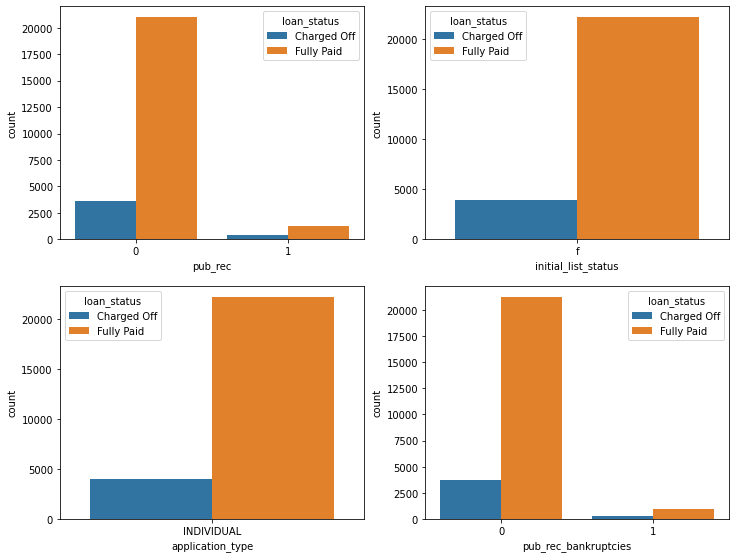

In [135]:
plt.figure(figsize=(12, 30))

plt.subplot(6, 2, 1)
sns.countplot(x='pub_rec', data=df, hue='loan_status')

plt.subplot(6, 2, 2)
sns.countplot(x='initial_list_status', data=df, hue='loan_status')

plt.subplot(6, 2, 3)
sns.countplot(x='application_type', data=df, hue='loan_status')

plt.subplot(6, 2, 4)
sns.countplot(x='pub_rec_bankruptcies', data=df, hue='loan_status')

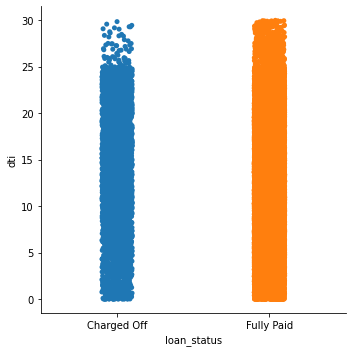

In [136]:
sns.catplot(x="loan_status", y="dti",kind="strip",data=df)


In [137]:

df["verification_status"].value_counts()

Not Verified       13160
Source Verified     7153
Verified            5853
Name: verification_status, dtype: int64

In [138]:
df["int_rate"].value_counts()

10.99%    637
7.51%     598
7.88%     537
11.49%    537
13.49%    474
         ... 
9.51%       1
12.36%      1
13.30%      1
9.83%       1
17.41%      1
Name: int_rate, Length: 343, dtype: int64

In [139]:
df["home_ownership"].value_counts()

RENT        14217
MORTGAGE     9876
OWN          1969
OTHER         104
Name: home_ownership, dtype: int64

In [140]:
df["purpose"].value_counts()

debt_consolidation    11720
credit_card            3269
other                  3038
home_improvement       1780
major_purchase         1671
car                    1228
small_business          894
wedding                 708
medical                 514
moving                  468
vacation                303
educational             280
house                   233
renewable_energy         60
Name: purpose, dtype: int64

In [141]:
df["total_acc"].value_counts()

15.0    1094
13.0    1093
14.0    1084
17.0    1052
12.0    1039
16.0    1025
11.0    1007
20.0     983
18.0     981
10.0     955
21.0     924
19.0     911
9.0      871
22.0     846
23.0     818
8.0      813
24.0     784
25.0     748
7.0      706
27.0     657
26.0     636
6.0      584
28.0     581
29.0     552
5.0      486
30.0     473
31.0     445
32.0     433
4.0      360
33.0     350
34.0     337
35.0     313
36.0     264
37.0     255
38.0     232
39.0     203
40.0     170
3.0      154
42.0     143
41.0     143
43.0     127
44.0     114
46.0     100
45.0      93
47.0      91
48.0      64
49.0      63
2.0        7
1.0        2
Name: total_acc, dtype: int64

In [142]:
# importing one hot encoder from sklearn 
from sklearn.preprocessing import LabelEncoder

In [143]:
df['loan_status']

1        Charged Off
3         Fully Paid
4         Fully Paid
5         Fully Paid
6         Fully Paid
            ...     
42258    Charged Off
42270     Fully Paid
42315    Charged Off
42371    Charged Off
42373    Charged Off
Name: loan_status, Length: 26166, dtype: object

In [144]:
#Applying Label Encoding to Loan Status
le = LabelEncoder()
df['loan_status'] = le.fit_transform(df.loan_status)
print(le.classes_)

['Charged Off' 'Fully Paid']


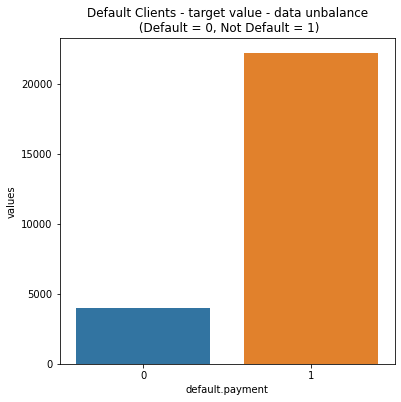

In [145]:
temp = df["loan_status"].value_counts()
df1 = pd.DataFrame({'default.payment': temp.index,'values': temp.values})
plt.figure(figsize = (6,6))
plt.title('Default Clients - target value - data unbalance\n (Default = 0, Not Default = 1)')
sns.set_color_codes("pastel")
sns.barplot(x = 'default.payment', y="values", data=df1)
locs, labels = plt.xticks()
plt.show()

In [146]:
df.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,last_fico_range_high,last_fico_range_low,collections_12_mths_ex_med,policy_code,application_type,acc_now_delinq,chargeoff_within_12_mths,delinq_amnt,pub_rec_bankruptcies,tax_liens
1,1077430,1314167.0,2500.0,2500.0,2500.0,60 months,15.27%,59.83,C,C4,...,499.0,0.0,0.0,1.0,INDIVIDUAL,0.0,0.0,0.0,0,0.0
3,1076863,1277178.0,10000.0,10000.0,10000.0,36 months,13.49%,339.31,C,C1,...,604.0,600.0,0.0,1.0,INDIVIDUAL,0.0,0.0,0.0,0,0.0
4,1075358,1311748.0,3000.0,3000.0,3000.0,60 months,12.69%,67.79,B,B5,...,694.0,690.0,0.0,1.0,INDIVIDUAL,0.0,0.0,0.0,0,0.0
5,1075269,1311441.0,5000.0,5000.0,5000.0,36 months,7.90%,156.46,A,A4,...,679.0,675.0,0.0,1.0,INDIVIDUAL,0.0,0.0,0.0,0,0.0
6,1069639,1304742.0,7000.0,7000.0,7000.0,60 months,15.96%,170.08,C,C5,...,654.0,650.0,0.0,1.0,INDIVIDUAL,0.0,0.0,0.0,0,0.0


In [147]:
# move the 'loan_status' column to the last position
lon_col = df.pop('loan_status')
df.insert(len(df.columns), 'loan_status', lon_col)

In [148]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 26166 entries, 1 to 42373
Data columns (total 57 columns):
 #   Column                      Non-Null Count  Dtype         
---  ------                      --------------  -----         
 0   id                          26166 non-null  object        
 1   member_id                   26166 non-null  float64       
 2   loan_amnt                   26166 non-null  float64       
 3   funded_amnt                 26166 non-null  float64       
 4   funded_amnt_inv             26166 non-null  float64       
 5   term                        26166 non-null  object        
 6   int_rate                    26166 non-null  object        
 7   installment                 26166 non-null  float64       
 8   grade                       26166 non-null  object        
 9   sub_grade                   26166 non-null  object        
 10  emp_title                   26166 non-null  object        
 11  emp_length                  26166 non-null  int64     

In [149]:
df.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,last_fico_range_low,collections_12_mths_ex_med,policy_code,application_type,acc_now_delinq,chargeoff_within_12_mths,delinq_amnt,pub_rec_bankruptcies,tax_liens,loan_status
1,1077430,1314167.0,2500.0,2500.0,2500.0,60 months,15.27%,59.83,C,C4,...,0.0,0.0,1.0,INDIVIDUAL,0.0,0.0,0.0,0,0.0,0
3,1076863,1277178.0,10000.0,10000.0,10000.0,36 months,13.49%,339.31,C,C1,...,600.0,0.0,1.0,INDIVIDUAL,0.0,0.0,0.0,0,0.0,1
4,1075358,1311748.0,3000.0,3000.0,3000.0,60 months,12.69%,67.79,B,B5,...,690.0,0.0,1.0,INDIVIDUAL,0.0,0.0,0.0,0,0.0,1
5,1075269,1311441.0,5000.0,5000.0,5000.0,36 months,7.90%,156.46,A,A4,...,675.0,0.0,1.0,INDIVIDUAL,0.0,0.0,0.0,0,0.0,1
6,1069639,1304742.0,7000.0,7000.0,7000.0,60 months,15.96%,170.08,C,C5,...,650.0,0.0,1.0,INDIVIDUAL,0.0,0.0,0.0,0,0.0,1


In [150]:
df.select_dtypes(include = ['object']).columns

Index(['id', 'term', 'int_rate', 'grade', 'sub_grade', 'emp_title',
       'home_ownership', 'verification_status', 'pymnt_plan', 'url', 'purpose',
       'title', 'zip_code', 'addr_state', 'revol_util', 'initial_list_status',
       'last_pymnt_d', 'last_credit_pull_d', 'application_type'],
      dtype='object')

In [151]:
columns_to_keep = ['loan_amnt', 'funded_amnt', 'funded_amnt_inv',
       'term', 'int_rate', 'installment', 'grade', 'sub_grade', 'emp_length',
       'home_ownership', 'annual_inc', 'verification_status',
       'pymnt_plan', 'purpose', 'title',  'addr_state',
       'dti', 'delinq_2yrs', 'earliest_cr_line', 'fico_range_low',
       'fico_range_high', 'inq_last_6mths', 'open_acc', 'pub_rec', 'revol_bal',
       'revol_util', 'total_acc', 'out_prncp',
       'out_prncp_inv', 'total_pymnt', 'total_pymnt_inv', 'total_rec_prncp',
       'total_rec_int', 'total_rec_late_fee', 'recoveries',
       'collection_recovery_fee', 'last_pymnt_d', 'last_pymnt_amnt',
       'last_credit_pull_d', 'last_fico_range_high', 'last_fico_range_low',
       'collections_12_mths_ex_med', 'policy_code', 'application_type',
       'acc_now_delinq', 'chargeoff_within_12_mths', 'delinq_amnt',
       'pub_rec_bankruptcies', 'tax_liens', 'loan_status']

In [152]:
df = df[columns_to_keep]


In [153]:
df.columns

Index(['loan_amnt', 'funded_amnt', 'funded_amnt_inv', 'term', 'int_rate',
       'installment', 'grade', 'sub_grade', 'emp_length', 'home_ownership',
       'annual_inc', 'verification_status', 'pymnt_plan', 'purpose', 'title',
       'addr_state', 'dti', 'delinq_2yrs', 'earliest_cr_line',
       'fico_range_low', 'fico_range_high', 'inq_last_6mths', 'open_acc',
       'pub_rec', 'revol_bal', 'revol_util', 'total_acc', 'out_prncp',
       'out_prncp_inv', 'total_pymnt', 'total_pymnt_inv', 'total_rec_prncp',
       'total_rec_int', 'total_rec_late_fee', 'recoveries',
       'collection_recovery_fee', 'last_pymnt_d', 'last_pymnt_amnt',
       'last_credit_pull_d', 'last_fico_range_high', 'last_fico_range_low',
       'collections_12_mths_ex_med', 'policy_code', 'application_type',
       'acc_now_delinq', 'chargeoff_within_12_mths', 'delinq_amnt',
       'pub_rec_bankruptcies', 'tax_liens', 'loan_status'],
      dtype='object')

In [154]:
# Using Label encoder on categorical columns
df[['term','int_rate', 'grade', 'sub_grade', 'home_ownership',
       'verification_status',  'pymnt_plan',  'purpose',
       'title',  'addr_state', 'earliest_cr_line', 'revol_util',
        'last_pymnt_d', 'last_credit_pull_d',
       'application_type']] = df[['term','int_rate', 'grade', 'sub_grade', 'home_ownership',
       'verification_status', 'pymnt_plan',  'purpose',
       'title',  'addr_state', 'earliest_cr_line', 'revol_util',
        'last_pymnt_d', 'last_credit_pull_d',
       'application_type']].apply(LabelEncoder().fit_transform)
     

/usr/local/lib/python3.9/dist-packages/pandas/core/frame.py:3641: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[k1] = value[k2]


In [155]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 26166 entries, 1 to 42373
Data columns (total 50 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   loan_amnt                   26166 non-null  float64
 1   funded_amnt                 26166 non-null  float64
 2   funded_amnt_inv             26166 non-null  float64
 3   term                        26166 non-null  int64  
 4   int_rate                    26166 non-null  int64  
 5   installment                 26166 non-null  float64
 6   grade                       26166 non-null  int64  
 7   sub_grade                   26166 non-null  int64  
 8   emp_length                  26166 non-null  int64  
 9   home_ownership              26166 non-null  int64  
 10  annual_inc                  26166 non-null  float64
 11  verification_status         26166 non-null  int64  
 12  pymnt_plan                  26166 non-null  int64  
 13  purpose                     261

In [156]:
#Exporting final data for model building

df.to_csv('/content/drive/My Drive/Jforce/finaldata.csv', encoding='utf-8', index=False)